In [ ]:
# 1. Import dataset and display first 5 rows.

# The values represent:
# TV (230.1) → Amount spent on TV advertising (in thousands of dollars, assuming units are in $1000).
# Sales (22.1) → Units of sales (in thousands of units).
import pandas as pd 
df = pd.read_csv('tvmarketing.csv')
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [2]:
#2.. Check column data types
print(df.dtypes)

TV       float64
Sales    float64
dtype: object


In [3]:
# rows and cols.
print(df.shape[0]) #rows
print(df.shape[1])#cols

200
2


In [4]:
# 4. Look at summary 
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


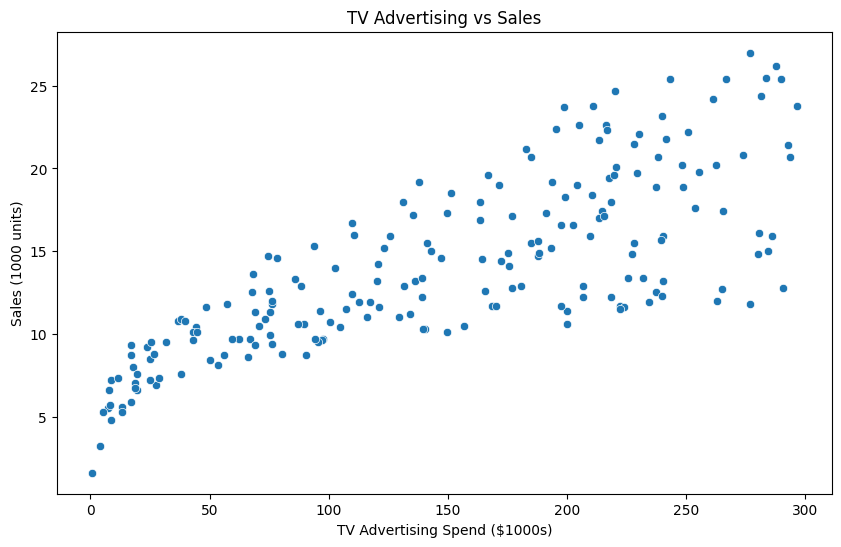

'\nThe diagram in the 5th cell is a scatter plot that visualizes the relationship between TV advertising spend and sales. Here\'s a breakdown of the elements in the plot:\n\n- **X-axis (TV Advertising Spend ($1000s))**: This axis represents the amount of money spent on TV advertising in thousands of dollars.\n- **Y-axis (Sales (1000 units))**: This axis represents the sales in thousands of units.\n- **Data Points**: Each point on the scatter plot represents a data entry from the dataset, showing the TV advertising spend and the corresponding sales.\n- **Title**: The title "TV Advertising vs Sales" indicates that the plot is showing the relationship between TV advertising spend and sales.\n- **Labels**: The x-axis and y-axis are labeled appropriately to indicate what each axis represents.\n\nThe scatter plot helps in visualizing whether there is a correlation between the amount spent on TV advertising and the sales. If the points tend to rise together, it suggests a positive correlation

In [5]:
# 5. Visualize the relationship between the features and the dependent variable 
# using scatterplots

import seaborn as sns#+
import matplotlib.pyplot as plt#+
#+
plt.figure(figsize=(10, 6))#+
sns.scatterplot(x='TV', y='Sales', data=df)#+
plt.title('TV Advertising vs Sales')#+
plt.xlabel('TV Advertising Spend ($1000s)')#+
plt.ylabel('Sales (1000 units)')#+
plt.show()#+
# {"conversationId":"158d4034-6be4-4366-b050-5db432122c07","source":"instruct"}


'''
The diagram in the 5th cell is a scatter plot that visualizes the relationship between TV advertising spend and sales. Here's a breakdown of the elements in the plot:

- **X-axis (TV Advertising Spend ($1000s))**: This axis represents the amount of money spent on TV advertising in thousands of dollars.
- **Y-axis (Sales (1000 units))**: This axis represents the sales in thousands of units.
- **Data Points**: Each point on the scatter plot represents a data entry from the dataset, showing the TV advertising spend and the corresponding sales.
- **Title**: The title "TV Advertising vs Sales" indicates that the plot is showing the relationship between TV advertising spend and sales.
- **Labels**: The x-axis and y-axis are labeled appropriately to indicate what each axis represents.

The scatter plot helps in visualizing whether there is a correlation between the amount spent on TV advertising and the sales. If the points tend to rise together, it suggests a positive correlation, meaning higher TV advertising spend is associated with higher sales.

'''


In [6]:
# Prepare feature matrix X and target vector y
X = df[['TV']]  #2-D DataFRame, Features - TV advertising budget (note the double brackets to keep it as DataFrame)
y = df['Sales'] #1-D, Target - Sales

# Let's see the shapes to verify
print("Shape of X:", X.shape)  # Should be (200, 1) - 200 samples, 1 feature
print("Shape of y:", y.shape)  # Should be (200,) - 200 samples

# Display first few values
print("first few values of  x: \n",X.head())

print("first few values of  y:\n",y.head())

Shape of X: (200, 1)
Shape of y: (200,)
first few values of  x: 
       TV
0  230.1
1   44.5
2   17.2
3  151.5
4  180.8
first few values of  y:
 0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64


In [7]:
# 7. Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train,  
# y_train, X_test, y_tes 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)#+


print("\n ********Test Values ********")

print("train X,y values:\n")
print("top 5 X_train:\n",X_train.head())
print("top 5 y_train:\n ",y_train.head())

print("\n test X,y values:\n")
print("top 5 X_test:\n ",X_test.head())
print("top 5 y_test:\n ",y_test.head())


 ********Test Values ********
train X,y values:

top 5 X_train:
         TV
169  284.3
97   184.9
31   112.9
12    23.8
35   290.7
top 5 y_train:
  169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
Name: Sales, dtype: float64

 test X,y values:

top 5 X_test:
          TV
95   163.3
15   195.4
30   292.9
158   11.7
128  220.3
top 5 y_test:
  95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64


In [8]:
# 8. Print the shape of train data and test data
# Verify shapes of training and testing datasets

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (140, 1)
Shape of y_train: (140,)
Shape of X_test: (60, 1)
Shape of y_test: (60,)


In [9]:
# 9. Perform Linear Regression (on train data) without using any library and 
# print the coefficients values

# Calculate the mean of X_train and y_train
X_mean = X_train['TV'].mean()
y_mean = y_train.mean()

# Calculate the terms needed for the numerator and denominator of beta
X_train['xy_cov'] = (X_train['TV'] - X_mean) * (y_train - y_mean)
X_train['xx_cov'] = (X_train['TV'] - X_mean) ** 2

# Calculate beta (slope)
beta = X_train['xy_cov'].sum() / X_train['xx_cov'].sum()

# Calculate alpha (intercept)
alpha = y_mean - (beta * X_mean)

# Print the coefficients
print("Calculated coefficients:")
print(f"Intercept (alpha): {alpha}")
print(f"Slope (beta): {beta}")





Calculated coefficients:
Intercept (alpha): 7.2394598307511355
Slope (beta): 0.04640780212815278


In [10]:
# 10. Create the model using the calculated coefficients and make predictions on the testing set

# Make predictions on the testing set
y_pred = alpha + beta * X_test['TV']

# Display the first few predictions
print("First few predictions:\n", y_pred.head())

# Compare with actual values
print("Actual values:\n", y_test.head())



First few predictions:
 95     14.817854
15     16.307544
30     20.832305
158     7.782431
128    17.463099
Name: TV, dtype: float64
Actual values:
 95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64


In [12]:
# 11.Perform Linear Regression using library(sklearn)
# 11. Perform Linear Regression using library(sklearn)
                    
from sklearn.linear_model import LinearRegression

# Create a LinearRegression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Get the coefficients
alpha_sklearn = model.intercept_
beta_sklearn = model.coef_[0]

# Print the coefficients
print("Coefficients using sklearn:")
print(f"Intercept (alpha): {alpha_sklearn}")
print(f"Slope (beta): {beta_sklearn}")

# Make predictions on the testing set
y_pred_sklearn = model.predict(X_train)

# Display the first few predictions
print("First few predictions using sklearn:\n", y_pred_sklearn[:5])

# Compare with actual values
print("Actual values:\n", y_test.head())

Coefficients using sklearn:
Intercept (alpha): 7.884529094684153
Slope (beta): 0.04797611852575237
First few predictions using sklearn:
 [14.99236142 16.59332661 13.22120804  6.06044322 12.71682427]
Actual values:
 95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64
